In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install beautifulsoup4
# BeautifulSoup is a Python library used for web scraping and parsing HTML and XML documents. 

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('train.csv')

In [5]:
new_df = df.sample(30000,random_state=2)
# The sample() method is used to randomly select a specified number of rows from the DataFrame

In [6]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [7]:
def preprocess(q):
    
    q=str(q).lower().strip()
    
#     Replace certain special characters with their string equivalents 
    q=q.replace('%','percent')
    q=q.replace('$','dollar')
    q=q.replace('@','at')
    
# by observation we got to know pattern '[math]' appears around 900 times in whole dataset
    q=q.replace('[math]','')

#   Replacing some numbers with string equivalent
    q = q.replace(',000,000,000','b ')
    q = q.replace(',000,000','m ')
    q = q.replace('000','k ')
    q = re.sub(r'([0-9]+)000000000',r'\1b',q)
    q = re.sub(r'([0-9]+)000000',r'\1m',q)
    q = re.sub(r'([0-9]+)000',r'\1k',q)
    
    
    
    contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I shall",
"I'll've": "I shall have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
    q_decontracted = []
    for word in q.split():
        if word in contractions:
            word = contractions[word]
        
        q_decontracted.append(word)
    
    q = ' '.join(q_decontracted)
    q = q.replace("'ve","have")
    q = q.replace("n't","not")
    q = q.replace("'re","are")
    q = q.replace("'ll","will")
    
#     Removing html tags:
    q = BeautifulSoup(q)
    q = q.get_text()
    
#     Removing punctuations 
    pattern = re.compile('\W')
    q = re.sub(pattern,' ',q).strip()
    
    return q
    

In [8]:
preprocess("I've already! wasn't <b>done</b>?")

'ihave already  was not done'

In [9]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [10]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


# Feature Engineering


In [11]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [12]:
def common_words(row):
    w1 = set(map(lambda word : word.lower().strip(),row['question1'].split()))
    w2 = set(map(lambda word : word.lower().strip(),row['question2'].split()))
    return len(w1&w2)

In [13]:
new_df['common_words'] = new_df.apply(common_words,axis=1)

In [14]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,common_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,12
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,7
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,3
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,3


In [15]:
def total_words(row):
    w1 = set(map(lambda word : word.lower().strip(),row['question1'].split()))
    w2 = set(map(lambda word : word.lower().strip(),row['question2'].split()))
    return (len(w1)+len(w2))

In [16]:
new_df['word_total'] = new_df.apply(total_words,axis=1)

In [17]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,common_words,word_total
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,7,22
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,3,36
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,0,32
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,3,13


In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,common_words,word_total
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,7,22
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,3,36
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,0,32
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,3,13


In [19]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,common_words,word_total
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,7,22
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,3,36
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,0,32
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,3,13


In [20]:
new_df.rename(columns={'common_words':'word_common'},inplace = True)

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,word_common,word_total
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,7,22
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,3,36
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,0,32
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,3,13


In [22]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [23]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,word_common,word_total,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,7,22,0.32
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,3,36,0.08
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,0,32,0.00
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,3,13,0.23


# Advanced Feature Engineering

In [24]:
from nltk.corpus import stopwords

In [25]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [26]:
from nltk.corpus import stopwords

In [27]:
def fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    
    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    #converting sentences into tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens)==0 :
        return token_features
    
#     get the non-stopwords in question ie words :
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #get the stop-words in question:
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    #get the common non-stopwords from Question Pair:
    common_word_count = len(q1_words.intersection(q2_words))
    
    #get the common stop-words from Question Pair:
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    #get the common token count:
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    
    #Last words of both question is same or not:
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    #First word of both question is same or not:
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [28]:
token_features = new_df.apply(fetch_token_features,axis = 1)

new_df["cwc_min"] = list(map(lambda x: x[0],token_features))
new_df["cwc_max"] = list(map(lambda x: x[1],token_features))
new_df["csc_min"] = list(map(lambda x: x[2],token_features))
new_df["csc_max"] = list(map(lambda x: x[3],token_features))
new_df["ctc_min"] = list(map(lambda x: x[4],token_features))
new_df["ctc_max"] = list(map(lambda x: x[5],token_features))
new_df["last_word_eq"] = list(map(lambda x: x[6],token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7],token_features))

In [29]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,12,26,0.46,0.874989,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,7,22,0.32,0.666644,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,3,36,0.08,0.000000,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,0,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,3,13,0.23,0.749981,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0


# Distance Based Advanced feature engineering 

In [62]:
pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16257 sha256=b80c963d5b94207abfa03b2e8fdf92a6ff26ba285742842ef8b1436e3a0312e4
  Stored in directory: /Users/rohitsahay/Library/Caches/pip/wheels/fb/cd/9c/3ab5d666e3bcacc58900b10959edd3816cc9557c7337986322
Successfully built distance
Note: you may need to restart the kernel to use updated packages.


In [33]:
import distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    #converting the sentence into tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    
    #absolute length feature
    length_features[0] = abs(len(q1_tokens)-len(q2_tokens))
    #avg token length :
    length_features[1] = (len(q1_tokens)+len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1,q2))
    length_features[2] = len(strs[0])/(min(len(q1),len(q2))+1)
        
    return length_features

In [34]:
length_features = new_df.apply(fetch_length_features,axis=1)

new_df['abs_len_diff'] = list(map(lambda x:x[0],length_features))
new_df['mean_len'] = list(map(lambda x:x[1],length_features))
new_df['longest_substr_ratio'] = list(map(lambda x:x[2],length_features))

In [35]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,word_common,word_total,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,12,26,...,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,7,22,...,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0,3.0,13.5,0.224490
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,3,36,...,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0,6.0,23.0,0.047619
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,0,32,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,21.5,0.050847
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,3,13,...,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0,4.0,7.0,0.542857


# Fuzzy features

In [35]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [36]:
from fuzzywuzzy import fuzz

In [37]:
def fetch_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    #fuzz ratio:
    #It stands for "Quick Ratio" and is designed to compute a similarity score between
    #two strings using a modified algorithm.
    fuzzy_features[0] = fuzz.QRatio(q1,q2)
    
    #fuzz partial ratio:
    # It calculates the similarity ratio between two strings, considering only partial matches.
    # It is particularly useful when you want to match substrings within larger strings.
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)
    
    #token_sort_ratio:
    #In FuzzyWuzzy, fuzz.token_sort_ratio() is a function used for fuzzy string matching,
    #specifically designed to handle strings that may have words in different orders but are otherwise similar.
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)
    
    #token_set_ratio:
    #In FuzzyWuzzy, fuzz.token_set_ratio() is a function used for fuzzy string matching,
    #designed to handle strings with words that might be in different orders and may contain duplicates.
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)
    
    return fuzzy_features

Both `fuzz.token_sort_ratio()` and `fuzz.token_set_ratio()` 
are functions in the FuzzyWuzzy library for fuzzy string matching.
They both handle cases where the words in the strings may be in different orders and may contain duplicates.
However, they use slightly different approaches to calculate the similarity ratio.

1. `fuzz.token_sort_ratio()`:
   - This function sorts the words in each string before comparing them. It then performs a simple ratio calculation between the sorted strings.
   - The sorting step ensures that the order of words is not considered during the comparison. It only considers the unique words present in both strings, treating each word as a token.
   - It is useful when you want to compare strings that contain the same words but in different orders.

2. `fuzz.token_set_ratio()`:
   - This function creates sets of unique words (tokens) for each string, disregarding the order of words.
   - It calculates the similarity ratio based on the intersection of tokens between the two sets and the total number of tokens in both sets.
   - The token set ratio is more forgiving than the token sort ratio because it takes into account the presence of duplicate words in both strings. Duplicates are treated as a single occurrence when calculating the ratio.
   - It is useful when you want to compare strings that contain the same words but may also have some duplicates or variations in word order.

Here's an example to illustrate the difference:

```python
from fuzzywuzzy import fuzz

string1 = "apple orange banana"
string2 = "banana apple apple orange"

token_sort_ratio = fuzz.token_sort_ratio(string1, string2)
token_set_ratio = fuzz.token_set_ratio(string1, string2)

print("Token Sort Ratio:", token_sort_ratio)
print("Token Set Ratio:", token_set_ratio)
```

In this example, `token_sort_ratio` will be higher than `token_set_ratio` because the sorting step in `fuzz.token_sort_ratio()` brings the words "apple" and "orange" in the same order in both strings. In contrast, `fuzz.token_set_ratio()` doesn't consider the order, and it treats duplicates as a single occurrence, resulting in a slightly lower ratio.

In summary, if you need to compare strings that might have different word orders but contain the same words, `fuzz.token_sort_ratio()` is a good choice. If you need to compare strings with variations in word order and possible duplicates, `fuzz.token_set_ratio()` may provide more accurate results.

In [38]:
fuzzy_features = new_df.apply(fetch_fuzzy_features,axis=1)

#creating new feature column for fuzzy features:
new_df['fuzz_ratio'] = list(map(lambda x:x[0],fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x:x[1],fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x:x[2],fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x:x[3],fuzzy_features))

In [39]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,word_common,word_total,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,12,26,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,7,22,...,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,3,36,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,0,32,...,0.000000,0.0,0.0,17.0,21.5,0.050847,29,41,23,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,3,13,...,0.333330,1.0,0.0,4.0,7.0,0.542857,55,70,48,69


In [40]:
new_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'word_common', 'word_total', 'word_share',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

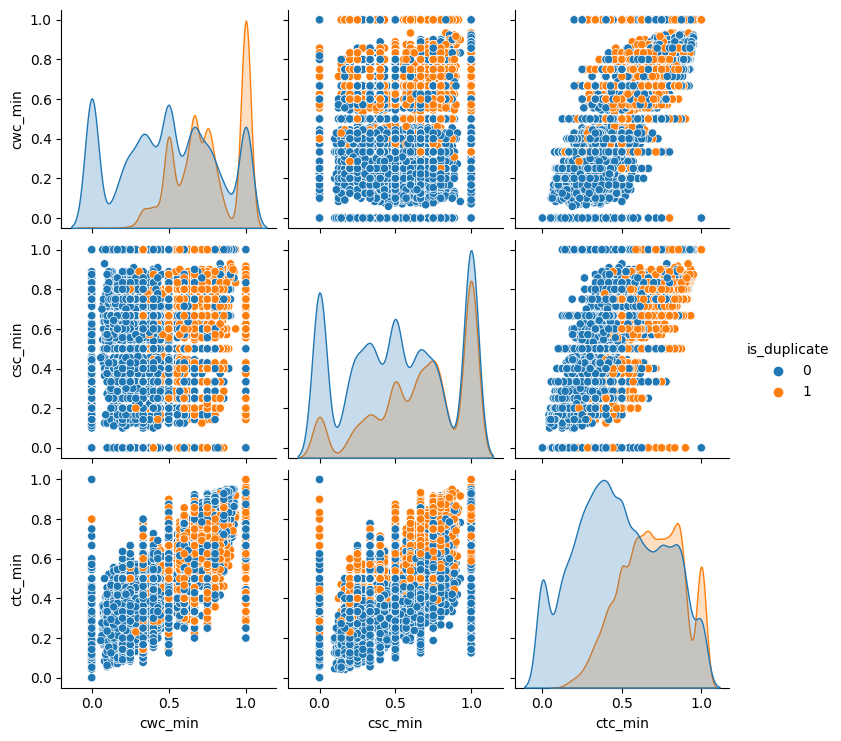

In [41]:
sns.pairplot(new_df[['cwc_min','csc_min','ctc_min','is_duplicate']],hue='is_duplicate')

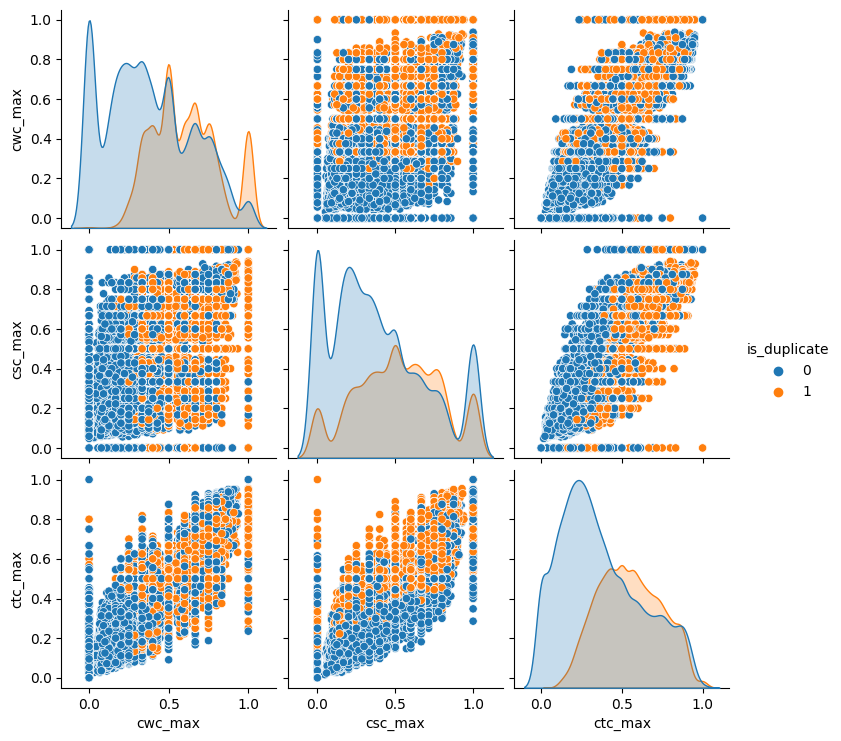

In [42]:
sns.pairplot(new_df[['cwc_max','csc_max','ctc_max','is_duplicate']],hue='is_duplicate')

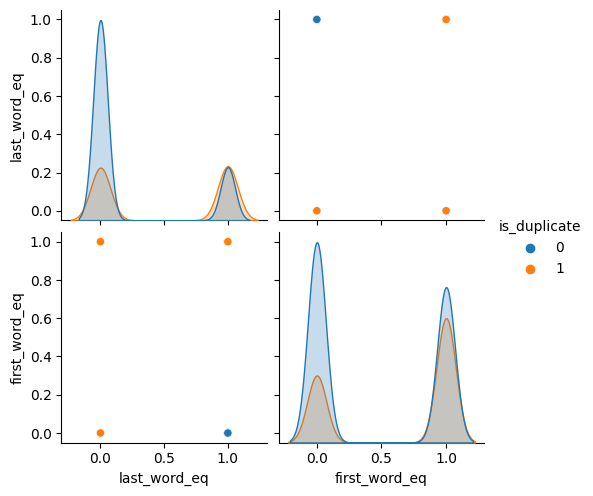

In [43]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate')

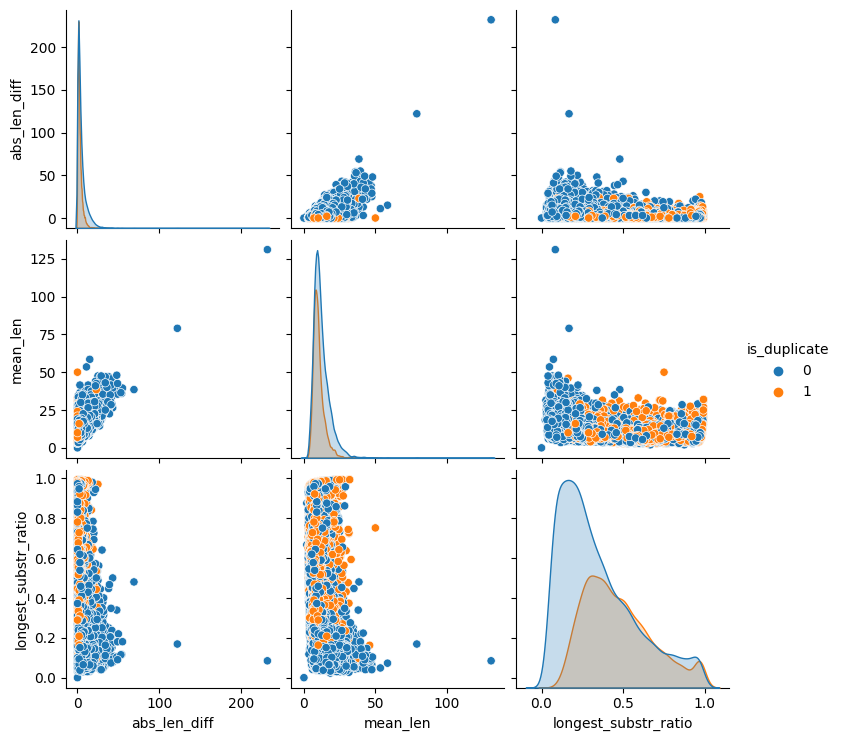

In [44]:
sns.pairplot(new_df[['abs_len_diff','mean_len','longest_substr_ratio','is_duplicate']],hue = 'is_duplicate')

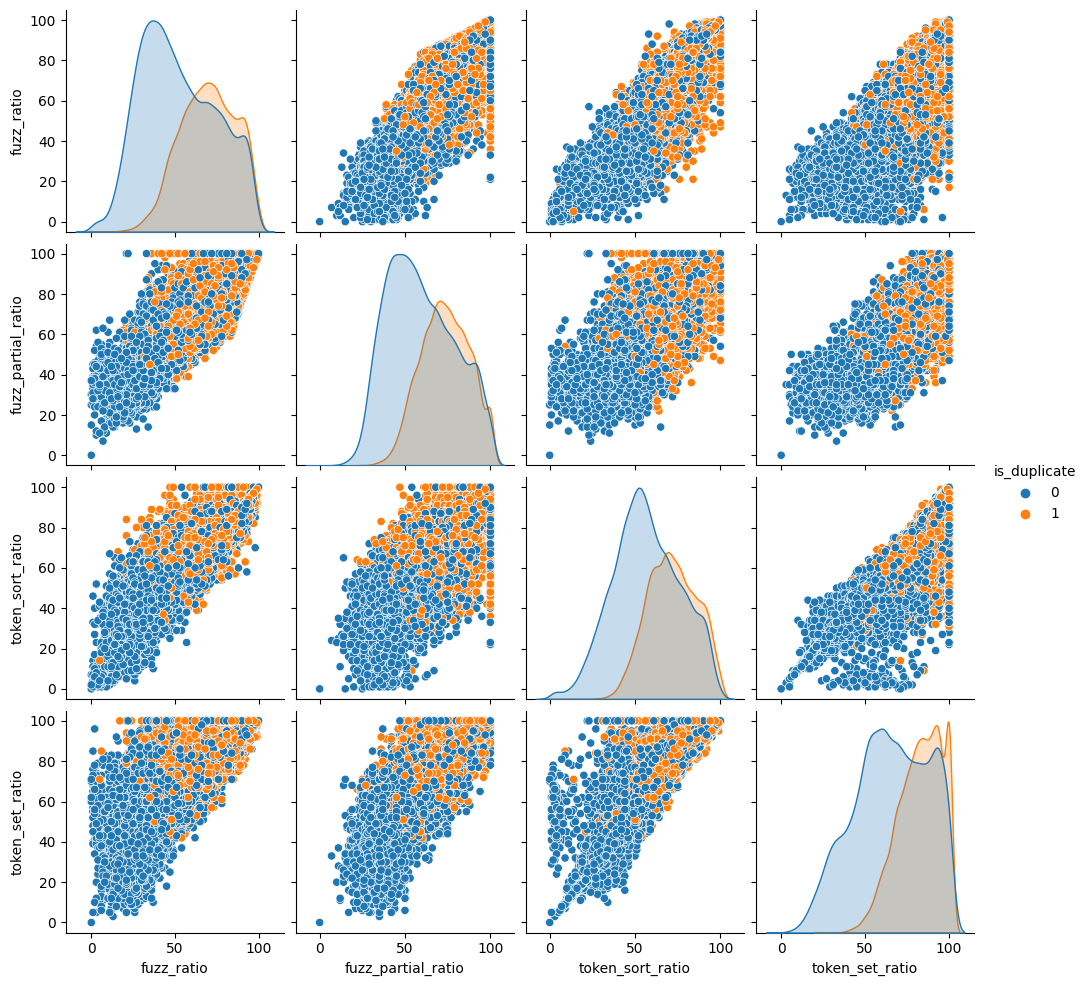

In [45]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio', 'token_set_ratio','is_duplicate']],hue='is_duplicate')

In [46]:
#using t-SNE(t-distributed stochastic neighbor embedding)
from sklearn.preprocessing import MinMaxScaler

In [47]:
new_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'word_common', 'word_total', 'word_share',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

In [48]:
X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio']])

y = new_df['is_duplicate'].values

In [49]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
n_components=2,
init ='random',
random_state = 101,
method = 'barnes_hut',
n_iter=1000,
verbose=2,
angle=0.5).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.028s...
[t-SNE] Computed neighbors for 30000 samples in 3.105s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

This code snippet involves dimensionality reduction using the t-Distributed Stochastic Neighbor Embedding (t-SNE) algorithm from the scikit-learn library. Here's what each part of the code does:

1. `from sklearn.manifold import TSNE`:
   This line imports the t-SNE class from the `sklearn.manifold` module, which is part of scikit-learn. t-SNE is a technique used for dimensionality reduction and data visualization.

2. `tsne2d = TSNE(...).fit_transform(X)`:
   This line initializes and fits a t-SNE model to the input data `X`, and then applies dimensionality reduction to obtain a 2D representation of the data. Let's break down the parameters used in the `TSNE` constructor:

   - `n_components=2`: This specifies that the t-SNE should generate a 2D representation of the data.
   - `init='random'`: This parameter specifies the initialization method for the optimization process. `'random'` indicates that random initialization will be used.
   - `random_state=101`: This sets the random seed for reproducibility of results.
   - `method='barnes_hut'`: This specifies the method used to approximate the t-SNE optimization. `'barnes_hut'` is a faster method suitable for large datasets.
   - `n_iter=1000`: This sets the maximum number of iterations for the optimization process.
   - `verbose=2`: This controls the level of verbosity during optimization. A higher value provides more detailed progress information.
   - `angle=0.5`: This parameter controls the trade-off between speed and accuracy of the Barnes-Hut approximation method.

   After creating the t-SNE model with these parameters, `.fit_transform(X)` is used to fit the model to the data `X` and obtain a 2D representation of the data in the `tsne2d` variable.

In summary, this code performs t-SNE dimensionality reduction on the input data `X`, aiming to obtain a 2D representation of the data while controlling various parameters of the t-SNE algorithm, such as initialization method, optimization method, and iteration count. The resulting 2D representation is stored in the `tsne2d` variable.

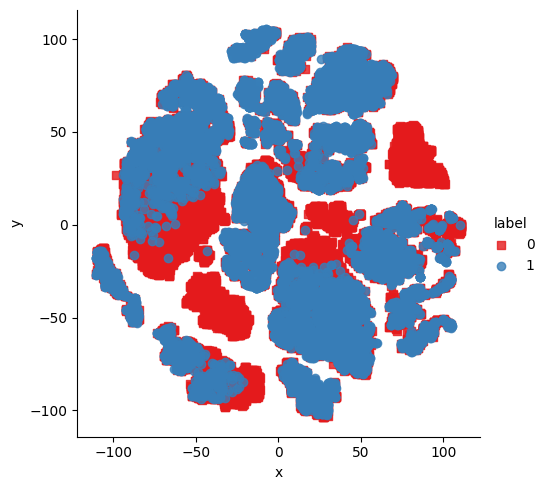

In [50]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'])

This code snippet builds upon the t-SNE dimensionality reduction and aims to create a scatter plot for the 2D representation of the data. Let's break down this code:

1. `x_df = pd.DataFrame({'x': tsne2d[:, 0], 'y': tsne2d[:, 1], 'label': y})`:
   Here, you are creating a pandas DataFrame named `x_df` that holds the 2D representation of the data obtained through t-SNE (`tsne2d`) along with the corresponding 'label' values (`y`). The DataFrame has three columns:
   - 'x': This column holds the values from the first column (`[:,0]`) of the 2D array `tsne2d`.
   - 'y': This column holds the values from the second column (`[:,1]`) of the 2D array `tsne2d`.
   - 'label': This column holds the values from the array `y`, which presumably represent the class labels or categories for each data point.

2. `sns.lmplot(...)`:
   This is a seaborn function call to create a scatter plot for the 2D representation of the data in `x_df`. Let's break down the parameters:

   - `data=x_df`: Specifies the DataFrame containing the data to be plotted.
   - `x='x'` and `y='y'`: These parameters specify which columns from the DataFrame will be used for the x and y axes of the scatter plot, respectively.
   - `hue='label'`: This parameter specifies that the 'label' column will be used to differentiate data points by color. Each unique value in the 'label' column will be assigned a different color, creating distinct color groups for different categories.
   - `fit_reg=False`: This parameter turns off the linear regression model fit line on the scatter plot.
   - `palette="Set1"`: This parameter sets the color palette to be used for the different 'label' values. The "Set1" palette likely consists of a set of distinct colors suitable for visualizing categories.
   - `markers=['s', 'o']`: This parameter specifies the markers to be used for the two different 'label' values. 's' represents square markers, and 'o' represents circular markers.

Overall, this code combines the t-SNE dimensionality reduction results with data visualization using seaborn to create a scatter plot in which data points are placed based on their 2D representation, colored according to their labels, and differentiated by marker shape. The linear regression fit line is turned off, resulting in a scatter plot that helps visualize how the data points are distributed in the reduced 2D space based on their categories.

In [51]:
tsne3d = TSNE(
n_components =3,
init = 'random',
random_state = 101,
method = 'barnes_hut',
n_iter = 1000,
verbose = 2,
angle=0.5).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.048s...
[t-SNE] Computed neighbors for 30000 samples in 3.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [52]:
new_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'word_common', 'word_total', 'word_share',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

In [53]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
327711,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
367788,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
151235,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [54]:
final_df = new_df.drop(columns = ['id','qid1','qid2','question1','question2'])


In [55]:
final_df.shape

(30000, 21)

In [56]:
final_df.head()

,is_duplicate,q1_len,q2_len,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,75,76,12,26,0.46,0.874989,0.874989,0.999980,0.999980,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,0,48,56,7,22,0.32,0.666644,0.499988,0.714276,0.624992,...,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,0,104,119,3,36,0.08,0.000000,0.000000,0.428565,0.272725,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,0,58,145,0,32,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,17.0,21.5,0.050847,29,41,23,30
151235,0,34,49,3,13,0.23,0.749981,0.599988,0.000000,0.000000,...,0.333330,1.0,0.0,4.0,7.0,0.542857,55,70,48,69


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])
questions

['what is the best marketing automation tool for small and mid size companies',
 'i am poor but i want to invest  what should i do',
 'i am from india and live abroad  i met a guy from france in a party i want to date him  how do i do that',
 'why do so many people in the u s  hate the southern states',
 'consequences of bhopal gas tragedy',
 'i killed a snake on a friday  there is a belief that when you kill a snake on a friday it will certainly take revenge  will i be killed',
 'is the royal family a net gain or a net loss to the british taxpayer',
 'if a huge asteroid was about to hit earth in x year  would we be able to find survival solutions in due time',
 'what would happen if a woman took viagra',
 'how could i improve my love to my girlfriend',
 'do you love your country  why',
 'can i take nyquil and sudafed at the same time',
 'what are some funny lies of narendra modi',
 'is there is a chance of rejection of jio sim after we get the first message',
 'i would like to start w

In [58]:
new_df.iloc[0,new_df.columns.get_loc('question1')]

'what is the best marketing automation tool for small and mid size companies'

In [59]:
new_df.iloc[1,new_df.columns.get_loc('question1')]

'i am poor but i want to invest  what should i do'

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [62]:
temp_df1 = pd.DataFrame(q1_arr,index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index = ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [64]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
final_df = pd.concat([final_df,temp_df],axis=1)

In [66]:
final_df.shape

(30000, 6021)

In [67]:
final_df.head()

,is_duplicate,q1_len,q2_len,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,75,76,12,26,0.46,0.874989,0.874989,0.999980,0.999980,...,0,0,0,0,0,0,0,0,0,0
115086,0,48,56,7,22,0.32,0.666644,0.499988,0.714276,0.624992,...,0,0,0,0,0,0,0,0,0,0
327711,0,104,119,3,36,0.08,0.000000,0.000000,0.428565,0.272725,...,0,0,0,0,0,0,0,0,0,0
367788,0,58,145,0,32,0.00,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
151235,0,34,49,3,13,0.23,0.749981,0.599988,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


df.iloc[row_index, column_index]


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred)

0.786

In [72]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [73]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7965

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3273,  539],
       [ 745, 1443]])

In [76]:
#for xgboost
confusion_matrix(y_test,y_pred1)

array([[3238,  574],
       [ 647, 1541]])

# Ending:

In [77]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(),q1.split()))
    w2 = set(map(lambda word: word.lower().strip(),q2.split()))
    return len(w1&w2)

In [78]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [79]:
def test_fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    
    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    #converting sentences into tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens)==0 :
        return token_features
    
#     get the non-stopwords in question ie words :
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #get the stop-words in question:
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    #get the common non-stopwords from Question Pair:
    common_word_count = len(q1_words.intersection(q2_words))
    
    #get the common stop-words from Question Pair:
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    #get the common token count:
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    
    #Last words of both question is same or not:
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    #First word of both question is same or not:
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [80]:
def test_fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    #converting the sentence into tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    
    #absolute length feature
    length_features[0] = abs(len(q1_tokens)-len(q2_tokens))
    #avg token length :
    length_features[1] = (len(q1_tokens)+len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1,q2))
    length_features[2] = len(strs[0])/(min(len(q1),len(q2))+1)
        
    return length_features

In [81]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features
